<a href="https://colab.research.google.com/github/AarohSinha100/DEEP_LEARNING/blob/main/COMPUTERVISION_NEURALNETWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRO TO COMPUTER VISION WITH TENSORFLOW

### What is a Convolutional neural network???
* A CNN is a kind of network architecture for deep learning algorithms and is specifically used for image recognition and tasks that involve the processing of pixel data.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

### Get The Data

The images we are working with are from the food101 datasets which is 101 diffrent classes of food https://www.kaggle.com/datasets/dansbecker/food-101.

### **However this is modified to only use 2 classes pizza and steak**

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip #Wget means get that file and download it in google colab

# Unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-05-05 08:45:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.6MB/s    in 5.8s    

2023-05-05 08:45:32 (17.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becommin one with the data.

And for a computer vision projects...this usually means visualizing a lot of saples of data

In [3]:
!ls pizza_steak #ls - List the files present in the pizza steak, we have test and train present! 

test  train


In [4]:
!ls pizza_steak/train #ls lists the file in the pizza_steak ---> train file

pizza  steak


In [5]:
!ls pizza_steak/train/steak #ls lists the file in the pizza_steak ---> train --->steak file

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os #Checking number of files we have in our folder

# Walk through the pizza steak direcotry and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


In [7]:
# The extra file in our pizza_steak directory is ".DS_Store"

!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 May  5 08:45 .
drwxr-xr-x 1 root root 4096 May  5 08:45 ..
drwxr-xr-x 4 root root 4096 May  5 08:45 test
drwxr-xr-x 4 root root 4096 May  5 08:45 train


In [8]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

In [9]:
num_steak_images_train

750

## Visualization

In [10]:
# Getting the class names
import pathlib
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #created a list of class_names from sub directories

In [11]:
print(class_names)

['pizza' 'steak']


In [12]:
# Visualizing with matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

#Going to select a image randomly
def view_random_image(target_dir, target_class):
  #Set the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  #Get random image path
  random_image = random.sample(os.listdir(target_folder),1)

  #Read in the image and plot is using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0]) #It is going to be returned back as a list
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") #Show the shape of the image

  return img

Image shape: (512, 512, 3)


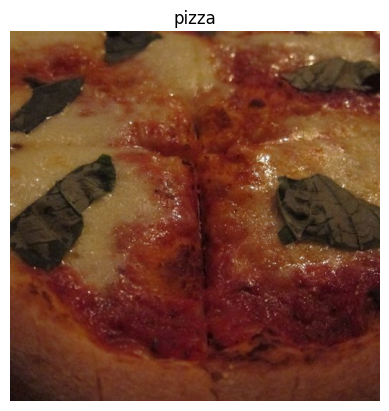

In [13]:
#View random image from the trianing dataset

img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [14]:
#The images are in form of giant array (dure to coor channels -r,g,b )
tf.constant(img)
# This is the tensor of the images. Now we will have to preprocess it and the use the model

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[152, 112,  50],
        [150, 110,  48],
        [148, 108,  47],
        ...,
        [207, 161, 112],
        [209, 165, 116],
        [214, 171, 120]],

       [[148, 110,  48],
        [147, 109,  47],
        [146, 108,  46],
        ...,
        [210, 163, 117],
        [215, 171, 122],
        [219, 175, 126]],

       [[149, 111,  49],
        [148, 110,  48],
        [146, 108,  46],
        ...,
        [201, 152, 111],
        [211, 164, 120],
        [215, 168, 124]],

       ...,

       [[ 27,  16,  14],
        [ 25,  14,  12],
        [ 25,  11,  10],
        ...,
        [ 64,  34,  26],
        [ 66,  36,  28],
        [ 74,  44,  36]],

       [[ 25,  14,  12],
        [ 25,  14,  12],
        [ 27,  13,  12],
        ...,
        [ 66,  36,  28],
        [ 66,  36,  28],
        [ 69,  39,  31]],

       [[ 25,  14,  12],
        [ 25,  14,  12],
        [ 27,  16,  14],
        ...,
        [ 66,  36,  2

In [15]:
#View the image shape
img.shape #returns width, height and color channels

(512, 512, 3)

We will have to normalize this data (encode it) before passing it to our model. As neural network prefers values between 0 and 1 We can divide the pizel values by 255.

In [16]:
# Get all the pizel value between 0 and 1
img/255. #Dot necessary

array([[[0.59607843, 0.43921569, 0.19607843],
        [0.58823529, 0.43137255, 0.18823529],
        [0.58039216, 0.42352941, 0.18431373],
        ...,
        [0.81176471, 0.63137255, 0.43921569],
        [0.81960784, 0.64705882, 0.45490196],
        [0.83921569, 0.67058824, 0.47058824]],

       [[0.58039216, 0.43137255, 0.18823529],
        [0.57647059, 0.42745098, 0.18431373],
        [0.57254902, 0.42352941, 0.18039216],
        ...,
        [0.82352941, 0.63921569, 0.45882353],
        [0.84313725, 0.67058824, 0.47843137],
        [0.85882353, 0.68627451, 0.49411765]],

       [[0.58431373, 0.43529412, 0.19215686],
        [0.58039216, 0.43137255, 0.18823529],
        [0.57254902, 0.42352941, 0.18039216],
        ...,
        [0.78823529, 0.59607843, 0.43529412],
        [0.82745098, 0.64313725, 0.47058824],
        [0.84313725, 0.65882353, 0.48627451]],

       ...,

       [[0.10588235, 0.0627451 , 0.05490196],
        [0.09803922, 0.05490196, 0.04705882],
        [0.09803922, 0

## An end-to-end example

Lets build convolutional neural network to find patterns in our images. we need a way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set the seed
tf.random.set_seed(42)

# Preprocess tdata (get all of the pixel values between 0 and 1 also called scaling/ normalization)
train_datagen = ImageDataGenerator(rescale=1./255) #Rescaled Images
valid_datagen = ImageDataGenerator(rescale=1./255) #Rescaled Images

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"


# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42) #reshape all the images by 224x224 (it is a very common shape to use)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [18]:
len(train_data)
#We get 47. We had 1500 data samples earlier and we set batch size to 32.
#1500/32 = 47. So we have 47 batches of 32 images and labels.
#we put things in batches so that it easily fit in our computer chip
#It gives computer chance to figure pattern in batch1, batch2 the batch 3..........batch n

47

In [19]:
#Build a CNN model (same as the Tivy VGG on the CNN explainer website)
#Conv relu--> Maxpool --> Conv relu -->Maxpool --> Flatten
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),

                           #Another layer
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile our CNN 
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,#Train data (with labels and datas) is preprocessed above
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data)) 

Epoch 1/5
47/47 [==============================] - 26s 242ms/step - loss: 0.5613 - accuracy: 0.7167 - val_loss: 0.4310 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4250 - accuracy: 0.8087 - val_loss: 0.3467 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.3778 - accuracy: 0.8367 - val_loss: 0.3454 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 10s 216ms/step - loss: 0.3247 - accuracy: 0.8693 - val_loss: 0.3192 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 12s 250ms/step - loss: 0.2259 - accuracy: 0.9187 - val_loss: 0.3604 - val_accuracy: 0.8400


######The fist epoch is usually longer than other epochs as it has to load data in model

######The eta (model) will take a lot of time because we are not using any harware accelarator (we can use GPU...in future vids)
#ETA - estimated time of arrival

* Before GPU
######Eta - 135s

* After GPU
######Eta - 25s

In [20]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the diffrent Model (Models we built in past) on our this datasets

In [21]:
#Set random seed
tf.random.set_seed(42)

#Make the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)), #Flatten - This function converts the multi-dimensional arrays into flattened one-dimensional arrays or single-dimensional arrays
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 196ms/step - loss: 4.7421 - accuracy: 0.6273 - val_loss: 0.7960 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6363 - accuracy: 0.7453 - val_loss: 0.5814 - val_accuracy: 0.7580
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.9016 - accuracy: 0.7107 - val_loss: 0.5680 - val_accuracy: 0.7680
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.5155 - accuracy: 0.7767 - val_loss: 0.6543 - val_accuracy: 0.7180
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6648 - accuracy: 0.7353 - val_loss: 1.4775 - val_accuracy: 0.6040


In [22]:
#It works but the performance is very bad. It has accuracy of 50 like its just guessing.

In [23]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Our cnn had 31000 trainable parameters but this model have like 602000 parameters. (20x more than CNN)

In [25]:
#Improving
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 195ms/step - loss: 3.5011 - accuracy: 0.6173 - val_loss: 0.6527 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 10s 206ms/step - loss: 0.8584 - accuracy: 0.6913 - val_loss: 0.4819 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.5677 - accuracy: 0.7527 - val_loss: 0.5957 - val_accuracy: 0.7400
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.7170 - accuracy: 0.7247 - val_loss: 0.6222 - val_accuracy: 0.7680
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.5545 - accuracy: 0.7707 - val_loss: 0.4951 - val_accuracy: 0.7740


####This model is having better performance, better accuracy (around 74 percent) but not that close to our CNN having 89 accuracy.
####But here w have 15 million trainable parameters (over 500 times than CNN but then also doesnot performs anywhere near CNN)
####This is the power of CNN.


In [26]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Note : You can think of trainable parameters as patterns a model can learn from data

## Binary Classification" Let's Break it Down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepare the model, scale, normalize)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6 . Adjust diffrent parameters and improve the model (try to beat the baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

# 1. Become One With The Data

Image shape: (384, 512, 3)
Image shape: (384, 512, 3)


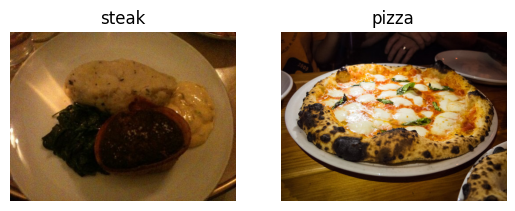

In [27]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1, 2, 2)
pizza__img = view_random_image("pizza_steak/train/","pizza")

# 2.Preprocessing The Data (Prepare It For The Model)

In [28]:
# Define our director dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our Next step is to turn our data into Batches (***Batch*** is a small subset of dataset that the model looks during training)

Because - 
* It cannot fit in the momory if there are a lot of images
* Trying to learn the pattern in 10000 images in one hit could result in the model not being able to learn very well
* 32 is most common batch size (We must not use more than 32 preferably)

In [29]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#ImageDataGenerator - Generate batches of tensor image data with real-time data augmentation.
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.) #Divide all the pizel values by 255, it will give pizel values between 0 and 1.

In [30]:
# Load in our image data from directories and turn them into batches

#flow_from_directory =  allows you to read the images directly from the directory and augment them while the neural network model is learning on the training data.
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224), # Target size of images (height, width)
                                               class_mode="binary", #Type of data you are working with
                                               batch_size=32) #Size of mini batches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [31]:
# Get a sample of train data batch
images, labels = train_data.next() #gets the 'next' batch of images/labels in traindata
len(images), len(labels) #32, 32 as the batch size is 32

(32, 32)

In [32]:
#How many batches are there
len(train_data) #47 batches

47

In [33]:
1500/32

46.875

In [34]:
# Get the first two images and seeing their tensors
images[:2], images[0].shape
#shape - (224, 224, 3)

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [35]:
images[7], images[7].shape

(array([[[0.30588236, 0.17254902, 0.227451  ],
         [0.34901962, 0.21960786, 0.25490198],
         [0.4039216 , 0.2784314 , 0.2901961 ],
         ...,
         [0.16470589, 0.02745098, 0.1137255 ],
         [0.16862746, 0.01960784, 0.10980393],
         [0.15686275, 0.00784314, 0.10588236]],
 
        [[0.28235295, 0.14901961, 0.20392159],
         [0.34117648, 0.21176472, 0.24705884],
         [0.42352945, 0.29803923, 0.30980393],
         ...,
         [0.17254902, 0.02352941, 0.1137255 ],
         [0.1764706 , 0.02745098, 0.11764707],
         [0.16078432, 0.01176471, 0.10980393]],
 
        [[0.2627451 , 0.13725491, 0.19607845],
         [0.3254902 , 0.20000002, 0.24313727],
         [0.41960788, 0.29803923, 0.31764707],
         ...,
         [0.19215688, 0.04313726, 0.1254902 ],
         [0.1764706 , 0.02745098, 0.11764707],
         [0.16862746, 0.03137255, 0.1254902 ]],
 
        ...,
 
        [[0.62352943, 0.5803922 , 0.5568628 ],
         [0.6039216 , 0.56078434, 0.53725

In [36]:
images[12].shape

(224, 224, 3)

In [37]:
# View the first batch of l;abels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

# 3.Create a CNN Model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and as you keep experimenting, you try to beat the baseline

> **Note** : In deep learning there is almost infinite amount of architectures we can make, one of the best way to get started is to start simple and then progress with complezity in each further model


In [38]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [39]:
#Create the model (this will be our baseline, a three layer CNN)

#This is a very simple model (Itna bda h because most lines are repeated)
model_4 = Sequential([
    #Layer 1
    Conv2D(filters=10, #Filters is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, #kernel size is the size of the sliding window going across an input
           strides=1, #strides is the size of the step sliding winodow takes across the input.
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)), #We have created the input shape above (we must tell our neural networks the input shapes)
    
    #Layer 2
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu"), #strides and padding are default as set in the first layer

    #Layer 3
    Conv2D(filters=3,
           kernel_size=1,
           activation="relu"),
    
    #Flatten now
    Flatten(),

    #Output layer
    Dense(1, activation="sigmoid") #Output layer (working with binary classification so only one neuron)

])

## BreakDown of Conv2D layer
RESOURCE -  https://www.analyticsvidhya.com/blog/2022/01/convolutional-neural-network-an-overview/

* filters - Decides how many filters should pass over an input tensor (eg - sliding window over an image)
* kernel_size - determines the shape of the filters over the output. (lower value learn smaller features, higher values learn larger features)
* Padding - pads the target tensor with zeroes (if "same") to preserve the inpt shape. or leaves the target tensor (if "valid"), lowering output shape.
* Strides - Number of steps a filter takes across an image at a time (eg. If strides=1, the filter moves across an image 1 pizel at a time) default = 1

In [40]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [41]:
#Lets get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 3)       33        
                                                                 
 flatten_3 (Flatten)         (None, 145200)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 145201    
                                                                 
Total params: 146,424
Trainable params: 146,424
Non-trainable params: 0
_________________________________________________________________


In [42]:
#Check the length of training and test data generators
len(train_data), len(test_data) #These are in batch sizes

(47, 16)

In [43]:
#Fit the model
history_4 = model_4.fit(train_data, #Combination of label and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 12s 208ms/step - loss: 0.5797 - accuracy: 0.7033 - val_loss: 0.4688 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 10s 213ms/step - loss: 0.4396 - accuracy: 0.8007 - val_loss: 0.3991 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.3660 - accuracy: 0.8493 - val_loss: 0.3603 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.2833 - accuracy: 0.8960 - val_loss: 0.4126 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.1775 - accuracy: 0.9460 - val_loss: 0.4271 - val_accuracy: 0.8180


In [44]:
# Not too bad accuracy for our first try (but also not as good as model 1, as we had combinations of convolutional layers)
#means model will improve with conv and maxpool layers
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## EVALUATING THE MODEL
 PLOTING THE LOSS CURVE

<Axes: >

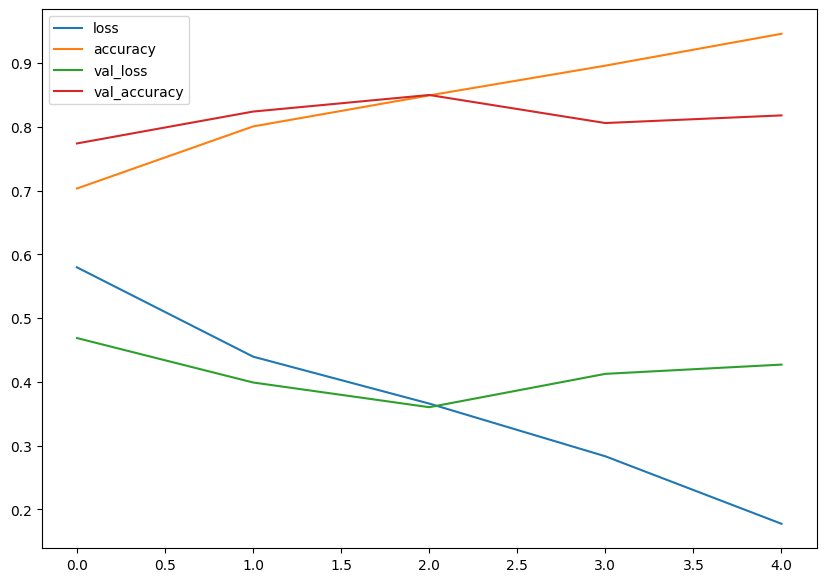

In [45]:
pd.DataFrame(history_4.history).plot(figsize=(10,7))
#higher the loss value more wrong the model
#accuracy goes up
#val accuracy and val loss remain same

In [46]:
#Plot validation and training curves seperately
def plot_loss_curve(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) #how many epchs did we run for?

  #Plot loss
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure() #Every time we want a new figure use plt.figure()
  plt.plot(epochs, accuracy, label="training accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

**Note -** when a models ***validation loss start to increase***, its likely that the model is overfitting the training dataset. Means it is learning the pattern in the datasets ***too well*** and the models ability to generalize unseen data will be diminished.

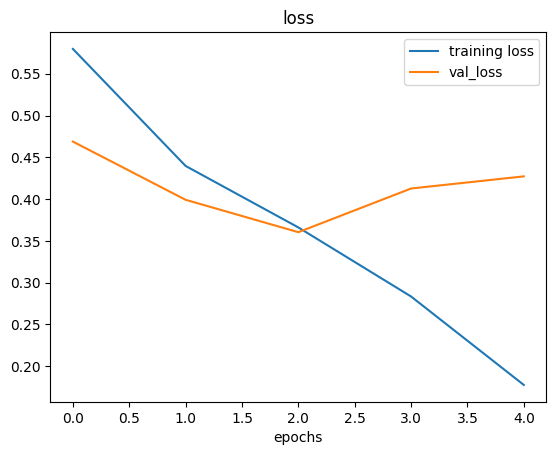

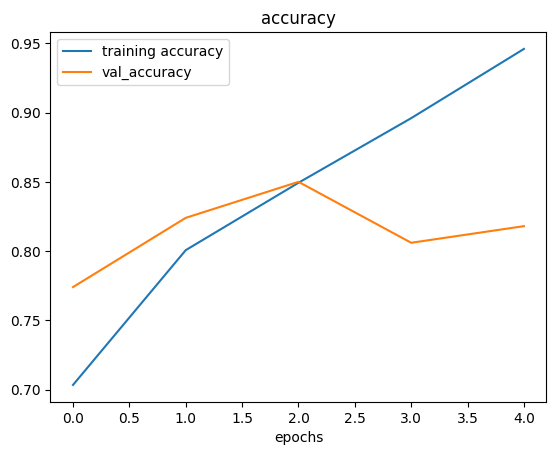

In [47]:
# Check out the loss and accuracy of all
plot_loss_curve(history_4)

### Now we have to combat the overfitting of our data (BY ADJUSTING THE MODEL PARAMETERS)

Fitting the Model comes in three steps - 
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting - 
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layre to the output of our flattened layer.

Reduce overfitting
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data

> ***NOTE - *** Reducing overfitting is also called *Regularization*

In [48]:
# Create a model (this is going to be our new baseline)
model_5 = Sequential([
    #layer 1
    Conv2D(filters = 10,kernel_size =  3, activation="relu",input_shape=(224,224,3)), #first layer so input shape
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid") #Output


    #The max pool layer is similar to convolution layer, but instead of doing convolution operation, we are selecting the max values in the receptive fields of the input
 ])



In [49]:
#Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [50]:
#Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 264ms/step - loss: 0.6159 - accuracy: 0.6567 - val_loss: 0.4998 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 9s 197ms/step - loss: 0.4618 - accuracy: 0.7907 - val_loss: 0.3855 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4242 - accuracy: 0.8133 - val_loss: 0.3757 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.3868 - accuracy: 0.8207 - val_loss: 0.3159 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 10s 207ms/step - loss: 0.3742 - accuracy: 0.8307 - val_loss: 0.3633 - val_accuracy: 0.8440


Check the pattern in shapes in this summary

In [51]:
#Now we got the val accuracy of nearly 80 percent (compared to the model_4 with 76 percent accuracy)
model_5.summary() #Check the pattern in shapes in this summary, it gets halved each maxpool layer.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

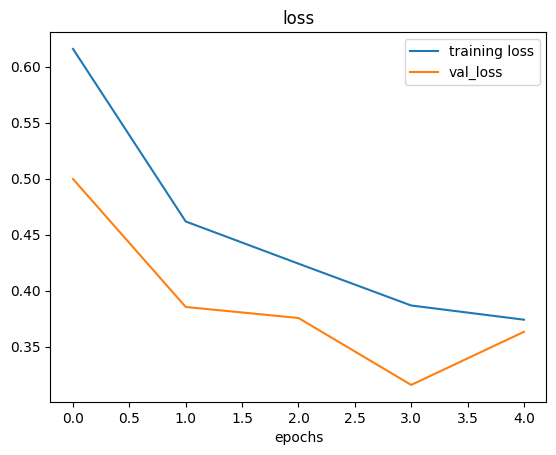

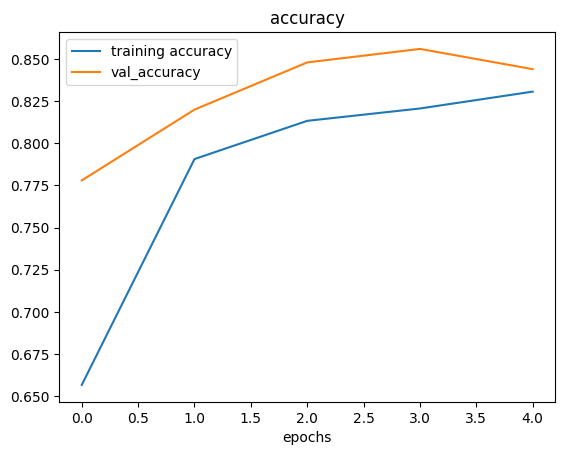

In [52]:
plot_loss_curve(history_5)

### DATA AUGMENTATION

In [53]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255. ,
                                             rotation_range=0.2, #how much do you wanna rotate your image? 0.2 works pretty OK ~ Instructor :)
                                             shear_range=0.2, #how much do you want to shear the image
                                             zoom_range=0.2, #how much do you want to zoom the image
                                             width_shift_range=0.2, #move your image around the x azis
                                             height_shift_range=0.3, #move your image around the y axis
                                             horizontal_flip=True) #do you want to flip the image


#Create image data generator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

#Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

### ***WHAT IS DATA AUGMENTATION?***
Data Augmentation is the process of altering our training data leaving leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similiar.

### Let's write some code to visualize data augmentation.

In [54]:
# Import data and augment it from training directory
print("Augmented training data - ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary", #default is categorical
                                                                   shuffle=False)


# Create nonr-augmented train data batches
print("Non Augmented training Data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

print("None-augmented test data:")
IMG_SIZE=(224,224)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data - 
Found 1500 images belonging to 2 classes.
Non Augmented training Data
Found 1500 images belonging to 2 classes.
None-augmented test data:
Found 500 images belonging to 2 classes.


NOTE - Data augmentation is usually only performed on the training data. Using ImageDataGenerator builtin data augmentation parameters our images are left as they are in the directories but are modified as they are loaded into the model.

### Finally...lets visualize some augmented data!!

In [55]:
#Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() #note: labels are not augmented, only train data

showing image number : 12


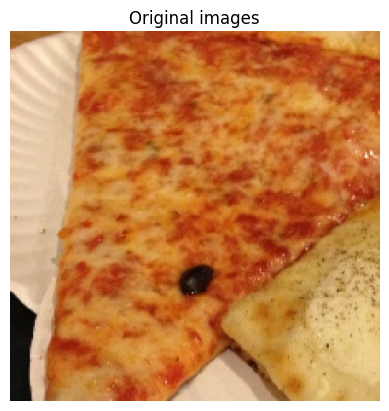

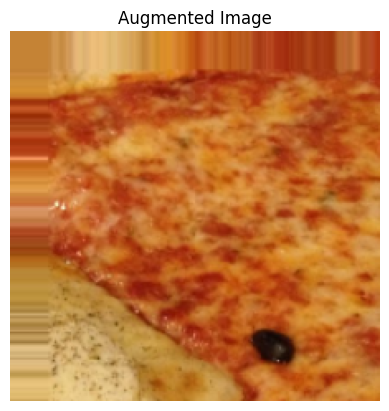

In [56]:
#Sjow the original image and the augmented images (This is why we did not shuffle the images)
import random
random_number = random.randint(0, 31) #our batch size is 32
print(f"showing image number : {random_number}")
plt.imshow(images[random_number]) #non augmented training data first batch
plt.title(f"Original images")
plt.axis(False) #We dont wanna access the axis

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False); #we dont wanna see the axis

Now we've seen what augmented training data looks like, now lets build a model and see how it leanrs on a augmented data

In [57]:
model_6 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented, #fitting model 6 on augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 497ms/step - loss: 0.7084 - accuracy: 0.5387 - val_loss: 0.7040 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 23s 498ms/step - loss: 0.7076 - accuracy: 0.5127 - val_loss: 0.6679 - val_accuracy: 0.5800
Epoch 3/5
47/47 [==============================] - 23s 495ms/step - loss: 0.6807 - accuracy: 0.6060 - val_loss: 0.6221 - val_accuracy: 0.7020
Epoch 4/5
47/47 [==============================] - 23s 500ms/step - loss: 0.6394 - accuracy: 0.6620 - val_loss: 0.5135 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 23s 499ms/step - loss: 0.6192 - accuracy: 0.6773 - val_loss: 0.5272 - val_accuracy: 0.7400


Not that good accuracy.....maybe we are overfitting.

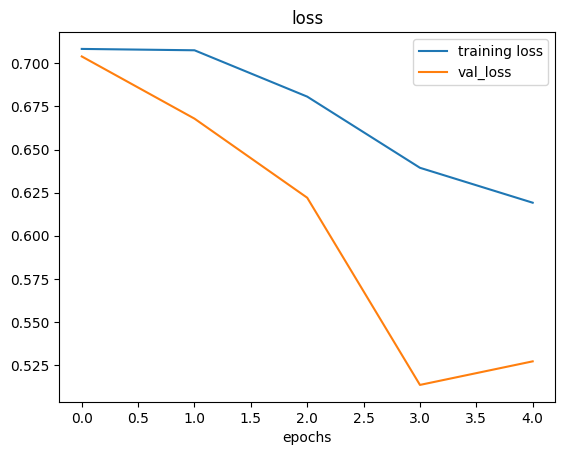

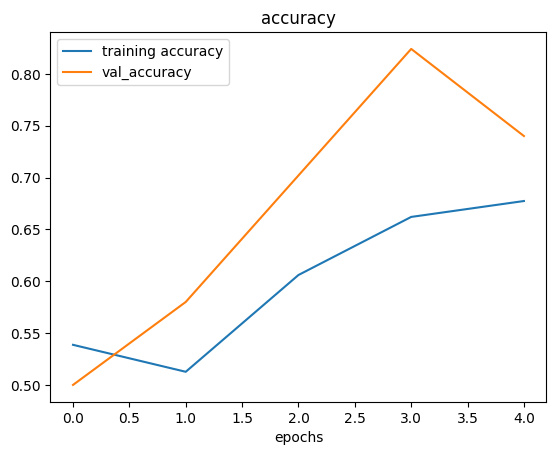

In [58]:
#Check our models training curves
plot_loss_curve(history_6)

#### This is probably because of not shuffling the model. Lets train model on augmented and shuffled data


Lets shuffle our augmented train data

In [59]:
# Import data and augment it and shuffle it form training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time
                                                                            

Found 1500 images belonging to 2 classes.


In [60]:
# Create the model (same as model 5 and model 6)
model_7 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 491ms/step - loss: 0.6818 - accuracy: 0.5687 - val_loss: 0.6269 - val_accuracy: 0.6680
Epoch 2/5
47/47 [==============================] - 23s 495ms/step - loss: 0.6285 - accuracy: 0.6447 - val_loss: 0.5491 - val_accuracy: 0.7200
Epoch 3/5
47/47 [==============================] - 23s 489ms/step - loss: 0.5433 - accuracy: 0.7293 - val_loss: 0.4420 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 23s 481ms/step - loss: 0.4964 - accuracy: 0.7820 - val_loss: 0.4610 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 23s 501ms/step - loss: 0.4985 - accuracy: 0.7627 - val_loss: 0.3693 - val_accuracy: 0.8480


Better loss as the data is shufled now. Means phots of pizza and steak are mixed. Earlier it was pizza first then all steak images

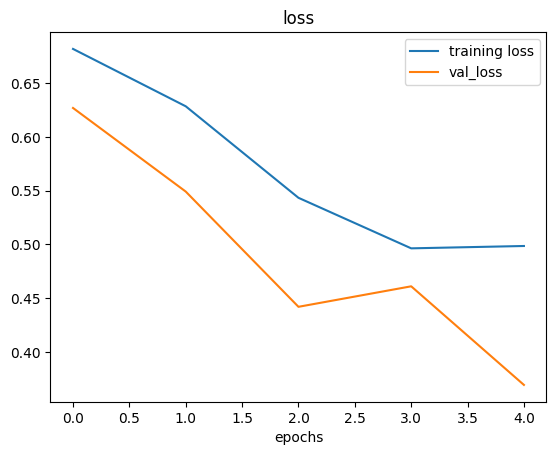

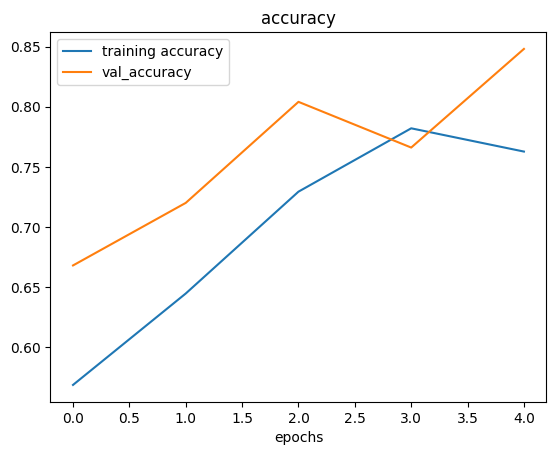

In [61]:
#Plot the loss curves
plot_loss_curve(history_7)

### Repeat Until Satisfied

Since we have already beat the baseline, there are few things we could try to continue to improve our model:

* Increase number of model layers (eg - add more Conv2D and MaxPool2D layers)
* Increase number of filters in convolutional layers (eg. from 1- to 32 to even 64)
* Train for longer
* Find an ideal learning rate
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case

### Making a prediction on training model with our own custom data

In [62]:
#Classes we are working with
print(class_names)

['pizza' 'steak']


--2023-05-05 08:54:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2023-05-05 08:54:44 (155 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



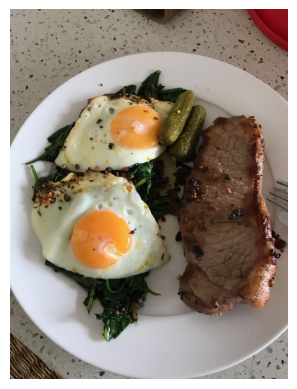

In [63]:
#View our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg #wget :)
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [64]:
# Check the shape of our images
steak.shape #This is a pretty large image

(4032, 3024, 3)

In [65]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

We need to preprocess the image and make it to the current shape

In [66]:
#Creating a helper function to import image and resize it to be able to be used with our model
def load_and_prep_image(filename,img_shape=224):
  """
  Reads an image from filename and turns it into tensor 
  and reshapes it into (img_shape, img_shape, color_channels)
  """
  #Reads in the image
  img = tf.io.read_file(filename) #read and outputs the entire contents of the filename.

  #Decode the read file into a tensor
  img = tf.image.decode_image(img) #Detects the format of the image and performs the appropriate operation to convert the input bytes into a Tensor of type dtype.
  #Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])

  #And the real images have data between 0 and 255
  #Rescale the images between 0 and 1
  img = img/255.
  return img
 

In [67]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

###  This is a prediction probability. This means how likely a image is one or another

* Since we are working with binary classification, and image probability of more than 0.5 means that it belongs to the positive class means the first class

* We have class 0 as pizz here and 1 as steak

In [68]:
model_7.predict(tf.expand_dims(steak,axis=0)) 

1/1 [==============================] - 0s 228ms/step


array([[0.93072945]], dtype=float32)

### Creating a helper function to know what the prediction is

In [69]:
#reminding ourselve of the class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [70]:
#We can index the predicted class by rounding th eprediction probability andindexing it to class names
pred = model_7.predict(tf.expand_dims(steak,axis=0)) 
pred_class = class_names[int(tf.round(pred))]

1/1 [==============================] - 0s 22ms/step


In [71]:
pred_class  #We are hetting t correct :)

'steak'

In [72]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model 
  and plots the image with the predicted class as the title
  """

  #Import the target image and preprocess it
  img = load_and_prep_image(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  #Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 18ms/step


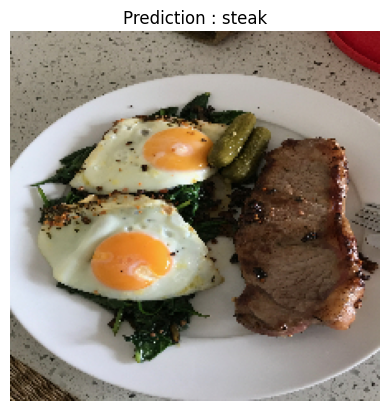

In [73]:
# Test our model on custom image
pred_and_plot(model_7, "03-steak.jpeg")

# WE ARE DONE WITH THIS BINARY CLASSIFICATION NOW

# MULTICLASS IMAGE CLASSIFICATION

**We have just been through a bunch of following steps in binary classifcation of pizza vs steak. Now we are going to step things up a notch with 10 classes of food**

1. Become one with the data
2. Preprocess the data (get it ready for modelling)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust diffrent hyperparameters and improve the model (try to beat the baseline/ reduce overfitting)
7. Repeat until satisfied

## 1.Import and Become one with data

In [74]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
#Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-05-05 08:54:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.6MB/s    in 23s     

2023-05-05 08:55:12 (21.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [75]:
import os

#Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images as '{dirpath}'.")

There are 2 directories and 0 images as '10_food_classes_all_data'.
There are 10 directories and 0 images as '10_food_classes_all_data/test'.
There are 0 directories and 250 images as '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images as '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images as '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images as '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images as '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images as '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images as '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images as '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images as '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images as '10_food_classes_all_data/test/ramen'.
There are 

In [76]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [77]:
#Lets get class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


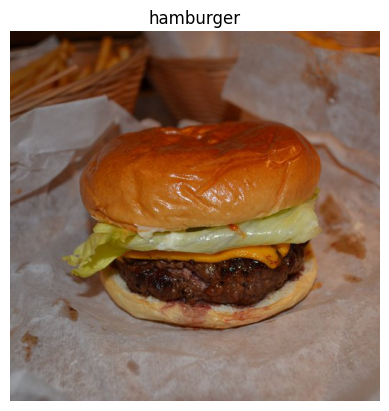

In [78]:
# Visualize Visizalize Visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. PreProcess The Data (Prepare it for Model)

In [79]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

Replicating the CNN explainer website model

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create a model (very similiar to previous model but actually same as CNN explainer website)
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10, 3,activation="relu"),
    Flatten(),
    Dense(10,activation="softmax") #softmax is used for for multiclass classification
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_8 = model_8.fit(train_data, #now 10 diffrent classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 52s 212ms/step - loss: 2.1213 - accuracy: 0.2371 - val_loss: 2.0040 - val_accuracy: 0.2704
Epoch 2/5
235/235 [==============================] - 49s 209ms/step - loss: 1.7286 - accuracy: 0.4120 - val_loss: 1.9384 - val_accuracy: 0.3212
Epoch 3/5
235/235 [==============================] - 50s 211ms/step - loss: 0.8044 - accuracy: 0.7468 - val_loss: 2.6615 - val_accuracy: 0.2688
Epoch 4/5
235/235 [==============================] - 49s 209ms/step - loss: 0.1483 - accuracy: 0.9601 - val_loss: 3.9289 - val_accuracy: 0.2636
Epoch 5/5
235/235 [==============================] - 50s 212ms/step - loss: 0.0276 - accuracy: 0.9944 - val_loss: 5.3476 - val_accuracy: 0.2580


### 4.Evaluate the Model

In [81]:
# Evaluate on test data
model_8.evaluate(test_data)

79/79 [==============================] - 12s 153ms/step - loss: 5.3476 - accuracy: 0.2580


[5.34756326675415, 0.257999986410141]

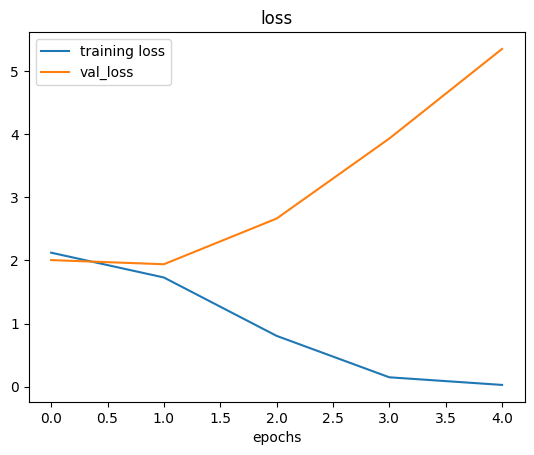

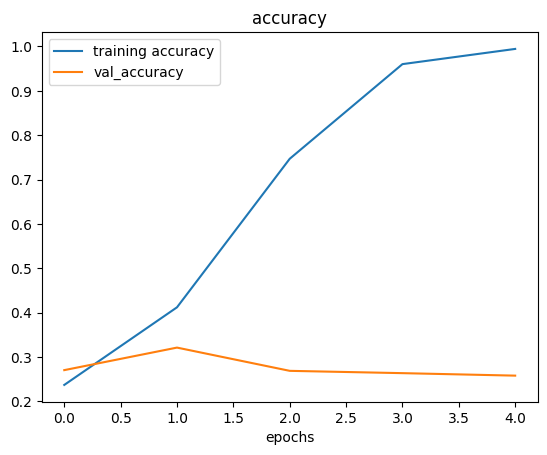

In [82]:
#Check out our models loss curves
plot_loss_curve(history_8)

**What do these loss curves tell us?**

Well it seems that the model is overfitting the training set quite badly.....in other words, it is getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 5. Adjust the models hyperparameters (to beat the baseline/ reduce overfitting)

Let's try and fix the overfitting by - 
* **Get more data -** having more data gives the model more opportunity to learn diverse patterns...
* **Simply the model** -  if our current model is overfitting the data, it may be too complicated of a model, one way to simplify the model is to: reduce number of layers or reduce number of hidden layers
* **Use data augmentation** -  data augmentation manipulates the training data in such a way by adding more diversity to it (without altering the original data)
* **Transfer learning -** transfer learning leverages the patterns other model has learned on similiar data to your own and allows you to use those patterns on your own dataset.

In [83]:
# How about we try and simplify the model first
#Lets try to remove first 2 conv layers

model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
           Conv2D(10, 3, activation="relu"),
           MaxPool2D(),
           Conv2D(10,3,activation="relu"),
           MaxPool2D(),
           Flatten(),
           Dense(10, activation="softmax")
           
])


model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [84]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 29160)            

In [85]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 61s 249ms/step - loss: 2.2197 - accuracy: 0.1791 - val_loss: 2.1001 - val_accuracy: 0.2188
Epoch 2/5
235/235 [==============================] - 49s 209ms/step - loss: 1.9046 - accuracy: 0.3449 - val_loss: 1.9745 - val_accuracy: 0.2880
Epoch 3/5
235/235 [==============================] - 49s 209ms/step - loss: 1.5148 - accuracy: 0.5005 - val_loss: 2.1586 - val_accuracy: 0.2848
Epoch 4/5
235/235 [==============================] - 49s 207ms/step - loss: 0.9646 - accuracy: 0.6859 - val_loss: 2.4303 - val_accuracy: 0.2696
Epoch 5/5
235/235 [==============================] - 49s 208ms/step - loss: 0.4496 - accuracy: 0.8673 - val_loss: 3.2410 - val_accuracy: 0.2532


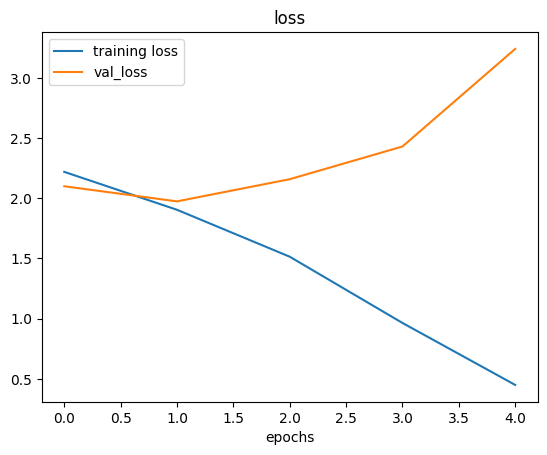

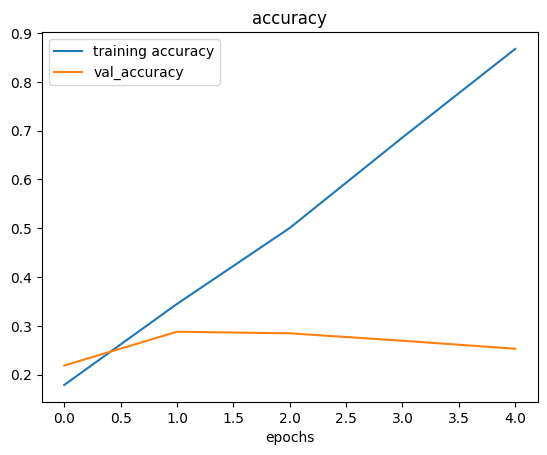

In [86]:
plot_loss_curve(history_9)

In [87]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 29160)            

In [88]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [89]:
model_8.evaluate(test_data)

79/79 [==============================] - 16s 205ms/step - loss: 5.3476 - accuracy: 0.2580


[5.347564220428467, 0.257999986410141]

In [90]:
model_9.evaluate(test_data)

79/79 [==============================] - 12s 151ms/step - loss: 3.2410 - accuracy: 0.2532


[3.2410242557525635, 0.2531999945640564]

### Trying to fix overfitting with data augmenatation

As the accuracy didnt wnet up and overfitting contuinued....lets try data augmentation

Ideally we want to:
* Reduce overfitting (get the train and loss curve closer)
* Imporve validation accuracy

In [95]:
#Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              zoom_range=0.2,
                                              horizontal_flip=True,
                                              )

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [97]:
#Lets create another model with this
model_10 = tf.keras.models.clone_model(model_8) #This time we wont write the whole model again....lets clone the architecture of the clone.

#Compile the cloned model (using the same setup as previous models)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [98]:
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))



Epoch 1/5
235/235 [==============================] - 124s 519ms/step - loss: 2.2785 - accuracy: 0.1324 - val_loss: 2.1916 - val_accuracy: 0.1680
Epoch 2/5
235/235 [==============================] - 117s 497ms/step - loss: 2.2031 - accuracy: 0.1816 - val_loss: 2.1145 - val_accuracy: 0.2412
Epoch 3/5
235/235 [==============================] - 118s 503ms/step - loss: 2.1387 - accuracy: 0.2295 - val_loss: 2.0108 - val_accuracy: 0.2740
Epoch 4/5
235/235 [==============================] - 117s 496ms/step - loss: 2.0760 - accuracy: 0.2655 - val_loss: 1.9179 - val_accuracy: 0.3136
Epoch 5/5
235/235 [==============================] - 123s 523ms/step - loss: 2.0278 - accuracy: 0.2820 - val_loss: 1.8867 - val_accuracy: 0.3396


In [99]:
model_10.evaluate(test_data)

79/79 [==============================] - 16s 206ms/step - loss: 1.8867 - accuracy: 0.3396


[1.8866978883743286, 0.33959999680519104]

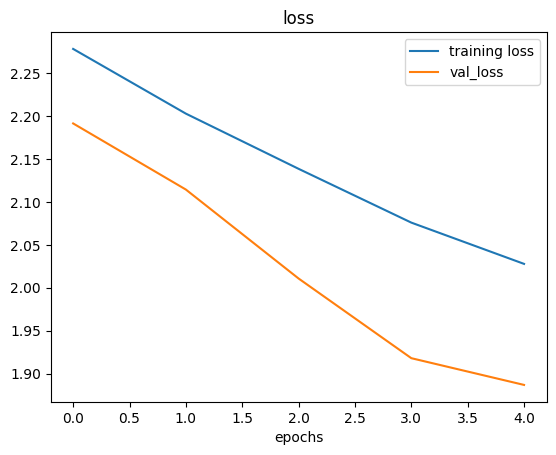

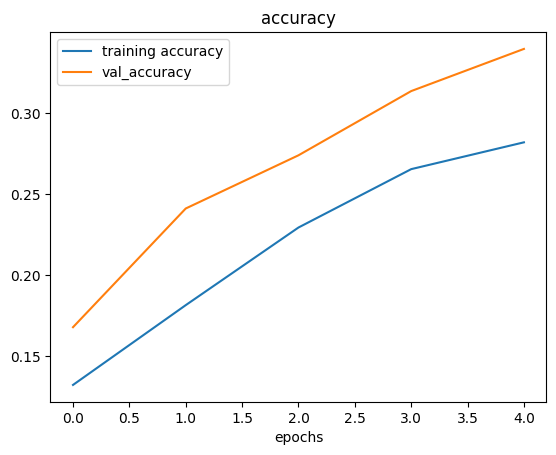

In [100]:
plot_loss_curve(history_10)

Woah!!! That looks much better, the loss curves are much better and closer to each other.

### 6.Repeat until satisfied

We could keep going here... continally trying to bring our loss curves closer together and trying to improve the validation/ test accuracy

How??
By running lots of experiments - 
* **Get more data -** having more data gives the model more opportunity to learn diverse patterns...
* **Simply the model** -  if our current model is overfitting the data, it may be too complicated of a model, one way to simplify the model is to: reduce number of layers or reduce number of hidden layers
* **Use data augmentation** -  data augmentation manipulates the training data in such a way by adding more diversity to it (without altering the original data)
* **Transfer learning -** transfer learning leverages the patterns other model has learned on similiar data to your own and allows you to use those patterns on your own dataset.

## Making a prediction with our trained Model

In [102]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [103]:
#Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-05-05 09:55:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-05-05 09:55:30 (261 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2023-05-05 09:55:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting 

In [108]:
#Reconfig pred and plot fuction to work with mlticlsas images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model 
  and plots the image with the predicted class as the title
  """

  #Import the target image and preprocess it
  img = load_and_prep_image(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  #Add in logic for multiclass
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]
  #Get the predicted class
  

  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 18ms/step


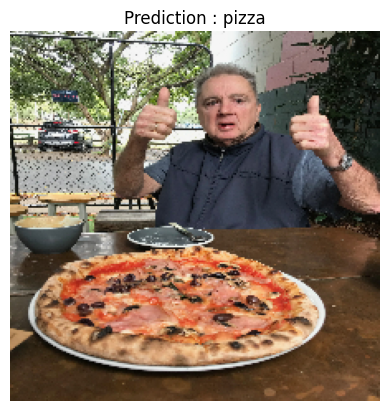

In [109]:
# Make a prediction using the model 10
pred_and_plot(model_10,
              "03-pizza-dad.jpeg",
              class_names=list(class_names))

1/1 [==============================] - 0s 30ms/step


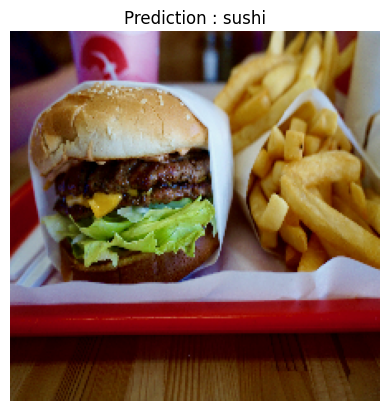

In [110]:
pred_and_plot(model_10,
              "03-hamburger.jpeg",
              class_names=list(class_names))

1/1 [==============================] - 0s 33ms/step


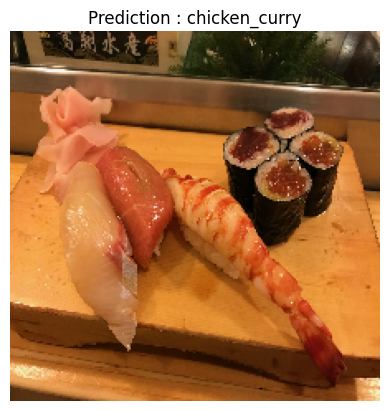

In [112]:
pred_and_plot(model_10,
              "03-sushi.jpeg",
              class_names=list(class_names))

1/1 [==============================] - 0s 31ms/step


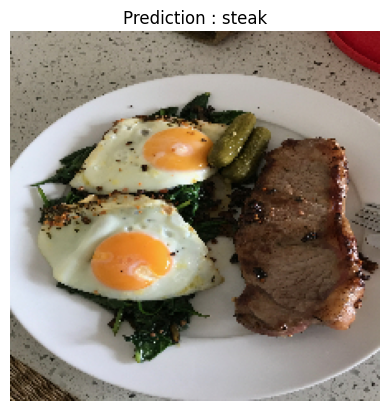

In [113]:
pred_and_plot(model_10,
              "03-steak.jpeg.1",
              class_names=list(class_names))

## Saving and loading our model

In [114]:
model_10.save("saved_trainde_model_10")

In [115]:
#Load in trainde model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trainde_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 12s 149ms/step - loss: 1.8867 - accuracy: 0.3396


[1.8866976499557495, 0.33959999680519104]